https://blog.quantinsti.com/python-trading/

Python language is ideal for 5-minute bars but when moving downtime sub-second time frames this might not be an ideal choice.
TA-Lib – TA-Lib or Technical Analysis library is an open-source library and is extensively used to perform technical analysis on financial data using technical indicators such as RSI (Relative Strength Index), Bollinger bands, MACD etc.
Zipline – Zipline is a Python library for trading applications that power the Quantopian service mentioned above. It is an event-driven system that supports both backtesting and live trading.
Financial data is available on various online websites. This data is also called as time-series data as it is indexed by time (the timescale can be monthly, weekly, daily, 5 minutely, minutely, etc.). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime as dt

#install yfinance for downloading stock data using 
#pip install yfinance

In [3]:
import yfinance as yf

In [4]:
data=yf.download("AAPL",start="2017-02-01",end="2019-11-1")

[*********************100%***********************]  1 of 1 completed


In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,143.720001,144.270004,143.009995,143.660004,137.828171,19661700
2017-04-03,143.710007,144.119995,143.050003,143.699997,137.866547,19985700
2017-04-04,143.250000,144.889999,143.169998,144.770004,138.893127,19891400
2017-04-05,144.220001,145.460007,143.809998,144.020004,138.173553,27717900
2017-04-06,144.289993,144.520004,143.449997,143.660004,137.828171,21149000


# What are Moving Averages?

In [ ]:
In the financial market, the price of securities tends to fluctuate rapidly and as a result, when we plot the graph of the price series, it is very difficult to predict the trend or movement in the price of securities.

In such cases moving average will be helpful as it smoothens out the fluctuations, enabling traders to predict movement easily.

In [ ]:
Slow Moving Averages: The moving averages with longer durations are known as slow-moving averages as they are slower to respond to a change in trend. This will generate smoother curves and contain lesser fluctuations.

In [ ]:
Fast Moving Averages: The moving averages with shorter durations are known as fast-moving averages and are faster to respond to a change in trend.

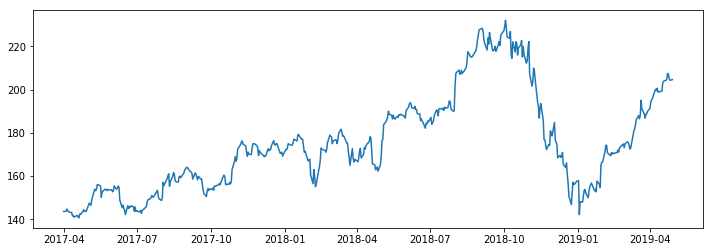

In [14]:
plt.figure(figsize=(12,4))
plt.plot(data.Close)

In [22]:
data['ma_10']=data.Close.rolling(10).mean()
data['ma_50']=data.Close.rolling(50).mean()
data['ma_200']=data.Close.rolling(200).mean()

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,ma_10,ma_50,ma_200
Date,,,,,,,,,
2017-03-31,143.720001,144.270004,143.009995,143.660004,137.828171,19661700,NaN,NaN,NaN
2017-04-03,143.710007,144.119995,143.050003,143.699997,137.866547,19985700,NaN,NaN,NaN
2017-04-04,143.250000,144.889999,143.169998,144.770004,138.893127,19891400,NaN,NaN,NaN
2017-04-05,144.220001,145.460007,143.809998,144.020004,138.173553,27717900,NaN,NaN,NaN
2017-04-06,144.289993,144.520004,143.449997,143.660004,137.828171,21149000,NaN,NaN,NaN


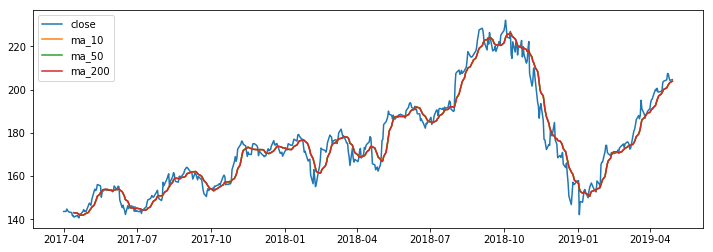

In [31]:
plt.figure(figsize=(12,4))
plt.plot(data.Close,label='close')
plt.plot(data.ma_10,label='ma_10')
plt.plot(data.ma_10,label='ma_50')
plt.plot(data.ma_10,label='ma_200')
plt.legend()

# MACD

In [32]:
#calculating exponential moving average
data['12d_ema']=data.Close.ewm(span=12).mean()
data['26d_ema']=data.Close.ewm(span=26).mean()

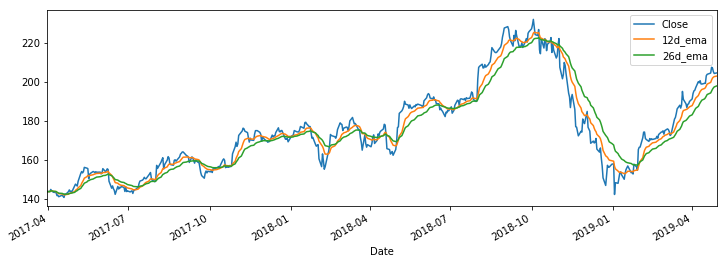

In [34]:
data[['Close','12d_ema','26d_ema']].plot(figsize=(12,4))

In [62]:
data['macd']=data['12d_ema']-data['26d_ema']

In [63]:
data['signal']=data.macd.ewm(span=9).mean()

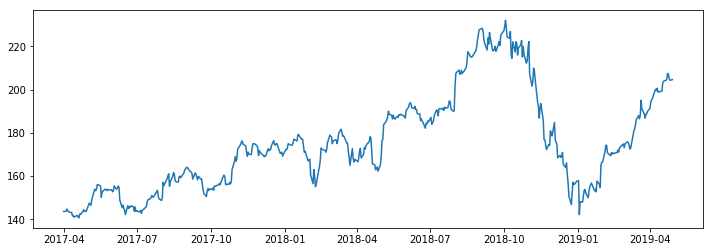

In [64]:
plt.figure(figsize=(12,4))
plt.plot(data['Close'])

In [85]:
data['macd'].shape

(522,)

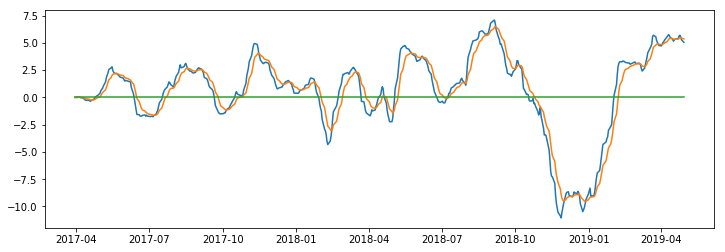

In [90]:
plt.figure(figsize=(12,4))
plt.plot(data['macd'])
plt.plot(data['signal'])
#data[['macd','signal']].plot(figsize=(12,4))
plt.plot(data.index,np.zeros((522,)))
#plt.show()

There are three most commonly used types of moving averages, the simple, weighted and the exponential moving average.

# Create a trading signal 
When the value of MACD series is greater than signal series then buy, else sell.

In [92]:
data['trading_signal']=np.where(data['macd']>data['signal'],1,-1)

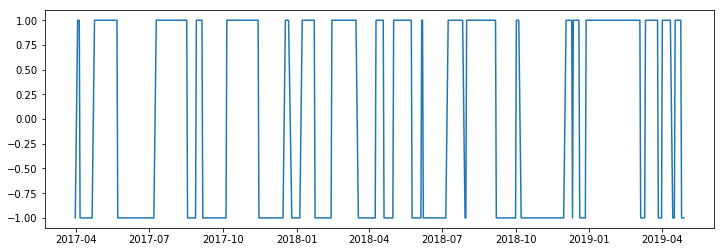

In [93]:
plt.figure(figsize=(12,4))
plt.plot(data['trading_signal'])

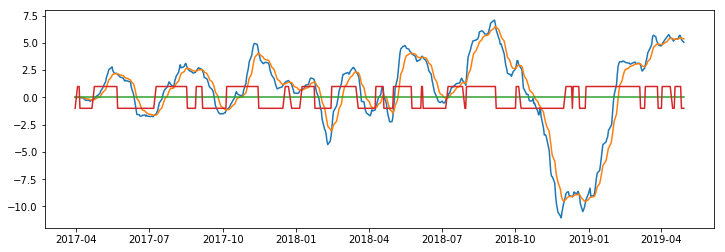

In [95]:
plt.figure(figsize=(12,4))
plt.plot(data['macd'])
plt.plot(data['signal'])
#data[['macd','signal']].plot(figsize=(12,4))
plt.plot(data.index,np.zeros((522,)))
plt.plot(data['trading_signal'])

# calculate the strategy return

In [96]:
#calculate returns
data['returns']=data.Close.pct_change()

In [97]:
data['returns'].head()

Date
2017-03-31         NaN
2017-04-03    0.000278
2017-04-04    0.007446
2017-04-05   -0.005181
2017-04-06   -0.002500
Name: returns, dtype: float64

In [98]:
#calculate stratergy returns
data['strategy_retuns']=data.returns*data.trading_signal.shift(1)

In [99]:
data.strategy_retuns.head()

Date
2017-03-31         NaN
2017-04-03   -0.000278
2017-04-04    0.007446
2017-04-05   -0.005181
2017-04-06   -0.002500
Name: strategy_retuns, dtype: float64

In [100]:
#cumulative returns
cumulative_returns=(data.strategy_retuns+1).cumprod()-1

In [101]:
cumulative_returns.head()

Date
2017-03-31         NaN
2017-04-03   -0.000278
2017-04-04    0.007166
2017-04-05    0.001948
2017-04-06   -0.000557
Name: strategy_retuns, dtype: float64

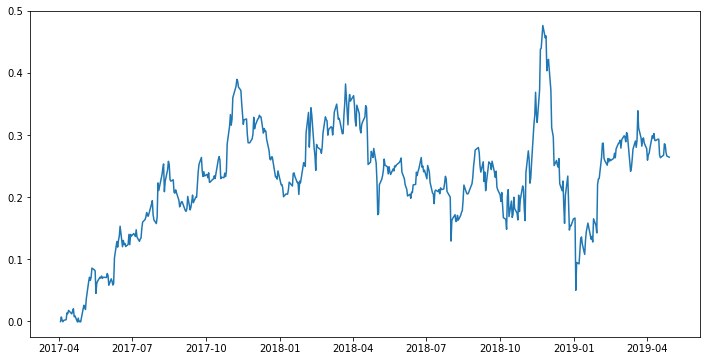

In [102]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_returns)

In [5]:
import pandas_datareader.data as web

In [6]:
#Second, retrive the data from, say, Yahoo
start = dt.datetime(2010,12,31) 
end = dt.datetime(2016,12,31)
df = web.DataReader('AAPL', 'yahoo', start, end)

In [7]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-30,46.501427,46.150002,46.497143,46.237144,39373600.0,40.230980
2010-12-31,46.211430,45.901428,46.135715,46.080002,48377000.0,40.094254
2011-01-03,47.180000,46.405716,46.520000,47.081429,111284600.0,40.965591
2011-01-04,47.500000,46.878571,47.491428,47.327145,77270200.0,41.179398
2011-01-05,47.762856,47.071430,47.078571,47.714287,63879900.0,41.516247
...,...,...,...,...,...,...
2016-12-23,116.519997,115.589996,115.589996,116.519997,14249500.0,111.307320
2016-12-27,117.800003,116.489998,116.519997,117.260002,18296900.0,112.014214
2016-12-28,118.019997,116.199997,117.519997,116.760002,20905900.0,111.536598


In [9]:
# Get the data for stock Facebook from 2017-04-01 to 2019-04-30
data = yf.download('AAPL', start="2017-04-01", end="2019-04-30")

[*********************100%***********************]  1 of 1 completed


In [10]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-31,143.720001,144.270004,143.009995,143.660004,137.828171,19661700
2017-04-03,143.710007,144.119995,143.050003,143.699997,137.866547,19985700
2017-04-04,143.250000,144.889999,143.169998,144.770004,138.893127,19891400
2017-04-05,144.220001,145.460007,143.809998,144.020004,138.173553,27717900
2017-04-06,144.289993,144.520004,143.449997,143.660004,137.828171,21149000
...,...,...,...,...,...,...
2019-04-23,204.429993,207.750000,203.899994,207.479996,205.285416,23323000
2019-04-24,207.360001,208.479996,207.050003,207.160004,204.968811,17540600
2019-04-25,206.830002,207.759995,205.119995,205.279999,203.108704,18543200
